# CSCA-5642: Diaster Tweets Classification Analysis Project #
#### Develop an algorithm to predict which Tweets are about real disasters and which ones are not. ####
    
* Author: Alexander Meau  
* Email: alme9155@colorado.edu  
* GitHub: [https://github.com/alme9155/csca-5642-week4/tree/main](https://github.com/alme9155/csca-5642-week4/tree/main)  


## I. Brief description of the problem and data ##

This project aims to tackle the Natural diaster tweet prediction to run a binary text classification whether a tweet refers to a real disaster event or not.
### Dataset: ####
* The competition dataset contains 3 CSV files: "train.csv", "test.csv" and "sample_submission.csv".
* File "train.csv" contains development data with target label (target=1) or not (target=0).
* File "test.csv" contains test data to be classified for the competition.
* File "sample_submission.csv" contains sample submission format after text classification prediction.

### Data Size and Dimension ####
* Training dataset: ~7000 tweet text with unique 'ID' columns and 'target' (0 - disaster, 1 - not diaster)
* Test dataset: ~3200 tweet text with same column structure as 'train.csv' without 'target' column.
* Both Training and Test dataset contains a 'keyword' column, such as "file", "earthquake"
* Both Training and Test dataset contains a 'location' with optional text value.

### Competition Rules ###
* Expected submission CSV files in the same format as "sample_submission.csv" with two columns "id, target". (id: unique id from test set, target: 0, or 1)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
print('File Listing from Kaggle Competition.')

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/glove-twitter-27b-100d-from-standford-nlp/glove.twitter.27B.100d.txt
File Listing from Kaggle Competition.


## II. Exploratory Data Analysis (EDA) ##
### II.i Data Exploration ###
- Inspect CSV file dimension (num of rows x num of columns)
- Inspect distribution of 'keyword', 'location' and 'target' columns

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

train_df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test_df = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
sample_submission_df = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')
print('Data File loaded.')

Data File loaded.


In [4]:
# Explore Development DataSet
print(f"\n{'=' * 10}Development DataSet (train.csv): {'=' * 10}\n")
display(train_df.head(10))
max_text_length_dev = train_df['text'].str.len().max()
print(f"Dimension of the development set: {train_df.shape[0]} rows, {train_df.shape[1]} columns")
print(f"Max length of Tweet text in Dev. DataSet: {max_text_length_dev}")

# Explore Test DataSet:
print(f"\n{'=' * 10}Test DataSet (test.csv): {'=' * 10}\n")
display(test_df.head(10))
max_text_length_test = test_df['text'].str.len().max()
print(f"Dimension of the development set: {test_df.shape[0]} rows, {test_df.shape[1]} columns")
print(f"Max length of Tweet text in Test DataSet: {max_text_length_test}")


# Explore Sapmle Submission file format:
print(f"\n{'=' * 10}Test DataSet (sample_submission.csv): {'=' * 10}\n")
display(sample_submission_df.head(5))
print(f"Dimension of the development set: {sample_submission_df.shape[0]} rows, {sample_submission_df.shape[1]} columns")



==========Development DataSet (train.csv): ==========



,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


Dimension of the development set: 7613 rows, 5 columns
Max length of Tweet text in Dev. DataSet: 157

==========Test DataSet (test.csv): ==========



,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


Dimension of the development set: 3263 rows, 4 columns
Max length of Tweet text in Test DataSet: 151

==========Test DataSet (sample_submission.csv): ==========



,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


Dimension of the development set: 3263 rows, 2 columns


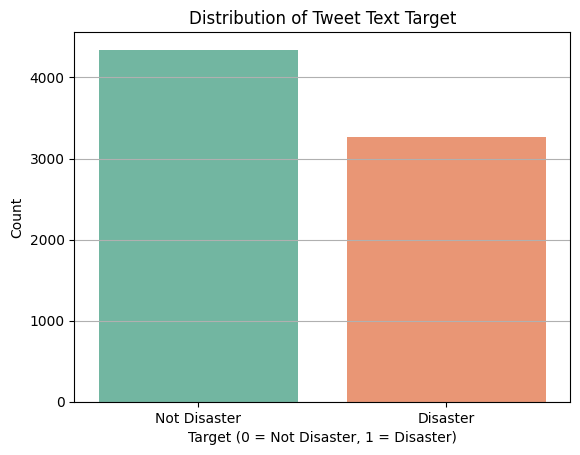

Rows missing 'target' value: 0 row(s)
--------------------
target
0    0.57034
1    0.42966
Name: proportion, dtype: float64


In [5]:
### Explore target column distribution of Tweet text.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=train_df, x='target', palette='Set2')
plt.title("Distribution of Tweet Text Target")
plt.xlabel("Target (0 = Not Disaster, 1 = Disaster)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Disaster', 'Disaster'])
plt.grid(axis='y')
plt.show()

missing_target_count = train_df['target'].isnull().sum()
print(f"Rows missing 'target' value: {missing_target_count} row(s)")
print('--------------------')
print(train_df['target'].value_counts(normalize=True))



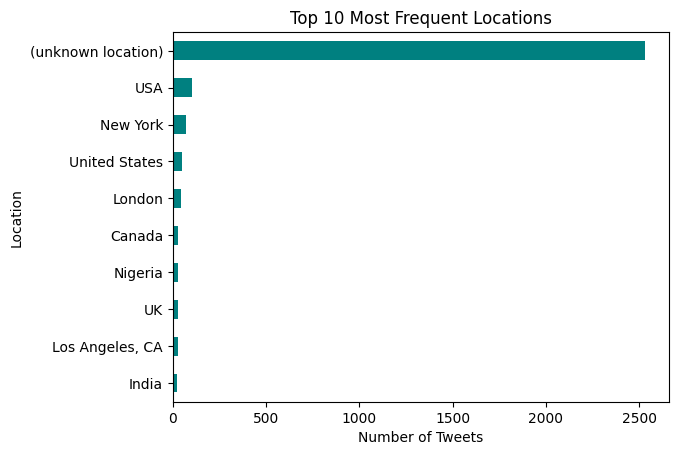

Rows missing 'location' value: 2533 row(s)
% of Rows missing 'location' value: 0.33
--------------------
location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
Some pum pum             1
Paulton, England         1
SEA Server               1
todaysbigstock.com       1
???????? ?????????.      1
Name: count, Length: 3341, dtype: int64


In [6]:
### Explore location column distribution of Tweet text.
train_location_df = train_df['location'].fillna('(unknown location)')
top_locations = train_location_df.value_counts().head(10)
top_locations.plot(kind='barh', color='teal')
plt.title("Top 10 Most Frequent Locations")
plt.xlabel("Number of Tweets")
plt.ylabel("Location")
plt.gca().invert_yaxis()
plt.show()

missing_location_count = train_df['location'].isnull().sum()
print(f"Rows missing 'location' value: {missing_location_count} row(s)")
print(f"% of Rows missing 'location' value: {missing_location_count/len(train_df):.2f}")
print('--------------------')
print(train_df['location'].value_counts(normalize=False))


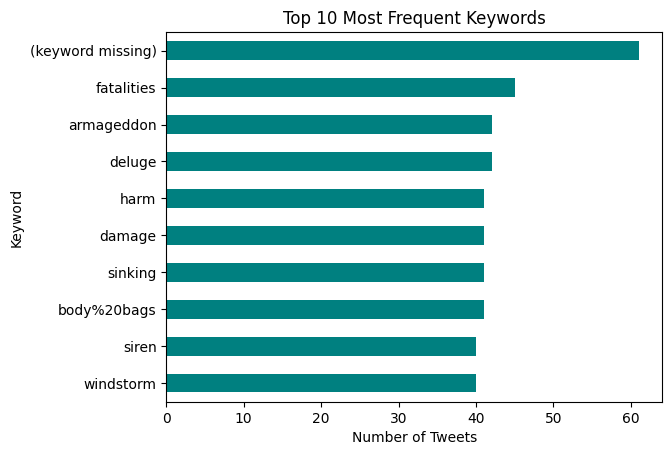

Rows missing 'keyword' value: 61 row(s)
% of Rows missing 'keyword' value: 0.01
--------------------
keyword
fatalities               45
armageddon               42
deluge                   42
harm                     41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64


In [7]:
### Explore keyword column distribution of Tweet text.
train_keyword_missing_df = train_df['keyword'].fillna('(keyword missing)')
top_locations = train_keyword_missing_df.value_counts().head(10)
top_locations.plot(kind='barh', color='teal')
plt.title("Top 10 Most Frequent Keywords")
plt.xlabel("Number of Tweets")
plt.ylabel("Keyword")
plt.gca().invert_yaxis()
plt.show()

missing_keyword_count = train_df['keyword'].isnull().sum()
print(f"Rows missing 'keyword' value: {missing_keyword_count} row(s)")
print(f"% of Rows missing 'keyword' value: {missing_keyword_count/len(train_df):.2f}")
print('--------------------')
print(train_df['keyword'].value_counts(normalize=False))


## II. Exploratory Data Analysis (EDA) ##
### II.ii. Data Analysis Summary ###
- The training dataset is slightly imbalanced (~57% of non-disaster tweets, ~43%) in the 'text' column.
- There is high missing rate in the 'location' column (33% of the column are empty.)
- On the contrary, only 1% of missing rate in the 'keyword' column.

### II.iii. Data Preparation ###
- It is recommended to apply the scikit-learn library on the 'text' column and use the compute_class_weight() method to modify the loss function. The computed weight metric allows the Keras library to adjust the weights during optimization.
- A high missing rate in the 'location' rate will introduce noise without bringing in much semantic value to the disaster text classification. Thus, the 'location' column should be ignored for this exercise.
- On the other hand, the 'keyword' column only has a 1% missing rate, and there are special keywords such as 'fatalities' and 'armageddon' in the dataset that can be used for disaster prediction.
- It is best to concatenate the 'keyword' column with the 'text' column to create a 'combined_text' column for the NLP processing instead of using a multi-input LSTM model with both 'keyword' and 'text' columns.
- Before concatenating the columns, missing values in the keyword column should be filled in with 'no_keyword' before NLP processing.
- Word2Vec library
The training dataset is slightly imbalanced (~57% of non-disaster tweets, ~43%) in the 'text' column. It is recommended to apply the scikit-learn library, the compute_class_weight() method to modify the loss function, allowing the Keras library to adjust the weights during optimization.


Weight dictionary: {0: 0.8766697374481806, 1: 1.1637114032405993}


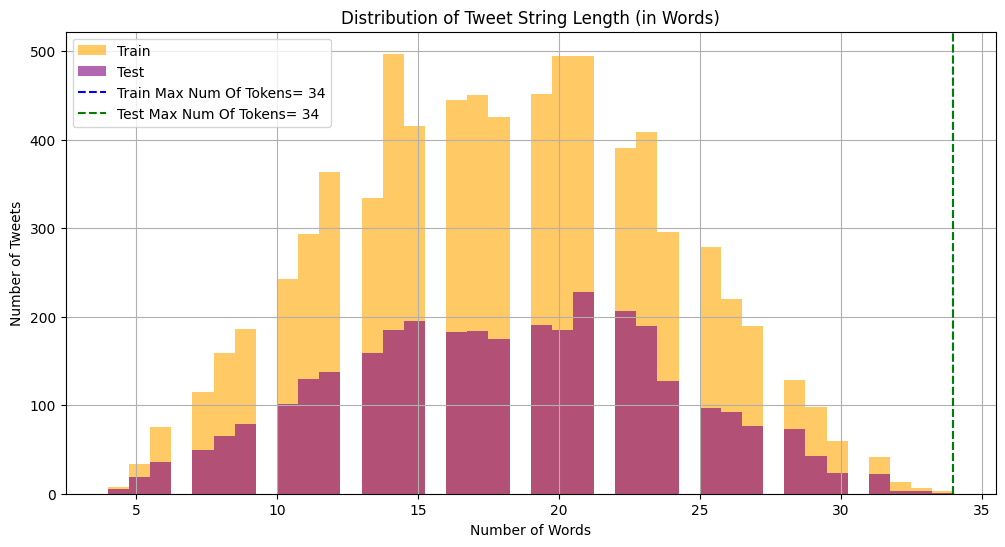

Data preparation complete.


In [8]:
# Data preparation before modeling
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

train_df['keyword'] =  train_df['keyword'].fillna('no_keyword')  
train_df['combined_text'] = '[KEYWORD] ' + train_df['keyword'] + ' [TEXT] ' + train_df['text']

test_df['keyword'] = test_df['keyword'].fillna('no_keyword')  
test_df['combined_text'] = '[KEYWORD] ' + test_df['keyword'] + ' [TEXT] ' + test_df['text']

# compute weight metrics
target_label = train_df['target'].values
unique_target = np.unique(target_label)  
weight = compute_class_weight(class_weight='balanced', classes=unique_target, y=target_label)
target_weight_dict = dict(zip(unique_target, weight))
print(f"Weight dictionary: {target_weight_dict}")

#show histogram of 'combined_text'
train_df['length_combined_text'] = train_df['combined_text'].apply(lambda x: len(str(x).split()))
test_df['length_combined_text'] = test_df['combined_text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(12, 6))
plt.hist(train_df['length_combined_text'], bins=40, alpha=0.6, label='Train', color='orange')
plt.hist(test_df['length_combined_text'], bins=40, alpha=0.6, label='Test', color='purple')
plt.axvline(train_df['length_combined_text'].max(), color='blue', linestyle='--', label=f'Train Max Num Of Tokens= {train_df["length_combined_text"].max()}')
plt.axvline(test_df['length_combined_text'].max(), color='green', linestyle='--', label=f'Test Max Num Of Tokens= {test_df["length_combined_text"].max()}')
plt.title('Distribution of Tweet String Length (in Words)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Tweets')
plt.legend()
plt.grid(True)
plt.show()

print('Data preparation complete.')

## III. Model Architecture ##

### III.i. Model Description ###
- This model implements Natural Language Processing (NLP) using Recurrent Neural Network (RNN) based model with pre-trained Word2Vec embedding.

### III.ii. NLP Word Embedding ###
- **Word2Vec** transforms words in the dataset into dense vector representations, capturing their semantic and contextual relationships.
- The resulting vectors correspond to words in the Word2Vec vocabulary, where the distance between two word vectors reflects their semantic or contextual similarity.
- The latent vector space learned by Word2Vec enables the model to infer relationships between words, even if certain words did not appear together in the training data.
- Since the total volume of the Tweeter text provided in this competition is less than 10,000 records (~7000), there is insufficient data to train any NLP engine to have meaningful contextual embeddings from scratch.
- To address this low resource probelm, I have to apply concept of transfer learning to use a pre-trained GloVe embedding from standford NLP project to fine-tune to this competition dataset: Ref:[https://nlp.stanford.edu/projects/glove/](https://nlp.stanford.edu/projects/glove/)
- Number of Parameters in this pre-trained embedding file = 1,200,000 words × 100 dimensions/word = 120,000,000
- For more information with NLP processing, please refer to the course material in **CSCA-5842: Deep Learning for Natural Language Processing.**

### III.iii. NLP Specific Technique ###
- **Word2Vec** require lemmatization to convert different part of speech to the base dictionary (e.g. "running" -> "run")
- The technique of stopword removal is also required to remove common words such as "the", "is", "and" that carry little semantic meaning but appears frequently.
- Text must be normalized to lowercase to ensure consistent vector matching.
- Punctuation should be removed to align with standard preprocessing practices and improve tokenization.
- URLs, which typically lack semantic value, should also be removed to enhance the quality of the input text.

### III.iv. RNN Model Architecture ###
- This RNN model contains single layer of 128 LSTM neural cell: 
  - Input dimension: 10,000 vocabulary size
  - Output dimension: 100 embedding dimension
  - Pre-trained GloVe embedding matrix from Standford NLP library
- Follow the RNN layer, a dropout layer (rate=0.2) to prevent overfitting
- Then, a fully connected dense layer (32 cells) and then another dropout layer (rate=0.2)
- The output layer is 1 neural unit with sigmoid activation for binary classification.
- Model is compiled with
  - ADAM optimizer with learning rate 1e-3
  - Loss function: Binary cross-entropy
  - Metrics: Accuracy and AUC
- Design Rationale:
  - According to the word token distribution above, both dataset has less than 35 tokens in the combined text.
  - While the RNN layer is used to learn the tokenized text, the dense layer is used to capture higher semantic meaning.
  - The initial 128 RNN is arbitrary; the dense layer is designed with the average token length in mind.

#### Reference ###
- Ref: [https://nlp.stanford.edu/projects/glove/](https://nlp.stanford.edu/projects/glove/)
- Ref: [https://www.coursera.org/learn/deep-learning-natural-language-processing](https://www.coursera.org/learn/deep-learning-natural-language-processing)
- Ref: [https://www.coursera.org/learn/fundamentals-natural-language-processing](https://www.coursera.org/learn/fundamentals-natural-language-processing)
- Ref: [https://www.analyticsvidhya.com/blog/2021/06/lstm-for-text-classification](https://www.analyticsvidhya.com/blog/2021/06/lstm-for-text-classification)


In [10]:
import pandas as pd
import re
import emoji
from urllib.parse import unquote
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# pre-processing text to use gloVe Word2Vec embedding
# combined_text field is separated by keyword: '[KEYWORD] ' + train_df['keyword'] + ' [TEXT] ' + train_df['text']
def preprocess_text(text):
    parts = re.split(r'\[KEYWORD\]|\[TEXT\]', text)
    if len(parts) >= 3:
        keyword = parts[1].strip()  # Extract keyword (between [KEYWORD] and [TEXT])
        main_text = parts[2].strip()  # Extract main text (after [TEXT])
    else:
        keyword = ''
        main_text = text
        
    main_text = main_text.lower()
    main_text = re.sub(r'http\S+|www\S+|https\S+', '', main_text, flags=re.MULTILINE)
    main_text = re.sub(r'[^\w\s]', '', main_text)
    main_text = emoji.demojize(main_text)
    words = nltk.word_tokenize(main_text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    processed_text = ' '.join(words)
    return f'[KEYWORD] {keyword} [TEXT] {processed_text}' if keyword else processed_text

train_df['normalized_text'] = train_df['combined_text'].apply(preprocess_text)
test_df['normalized_text'] = test_df['combined_text'].apply(preprocess_text)

print('text normalization complete.')


text normalization complete.


In [11]:
# loading Keras library
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam

print('Keras library loaded.')

2025-07-21 01:13:36.381216: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753060416.559776      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753060416.611687      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Keras library loaded.


In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score, classification_report
from tensorflow.keras.metrics import AUC
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Bidirectional

## Word2Vec RNN Model class
class Word2VecRNNClassifier:
    def __init__(self, 
                 embedding_params: dict,
                 sequence_model_params: dict,
                 class_weights: dict = None,
                 pretrained_embedding_path = None):
        """
        Initializes the TextClassifier with embedding-specific and sequence-specific dictionaries.
        """
        #unpack embedding parameters
        self.vocabulary_size = embedding_params['vocabulary_size']
        self.embedding_dimension = embedding_params['embedding_dimension']
        self.max_length = embedding_params['max_length']

        #unpack sequential parameters
        self.rnn_units = sequence_model_params.get('rnn_units', 128)
        self.dense_units = sequence_model_params.get('dense_units', 32)
        self.dropout_rate = sequence_model_params.get('dropout_rate', 0.2)
        self.num_classes = sequence_model_params.get('num_classes', 2)
        self.use_gru = sequence_model_params.get('use_gru', False)
        self.learning_rate = sequence_model_params.get('learning_rate', 1e-3)

        self.embedding_matrix = None
        self.trainable_embeddings = False
        self.model = None

    def load_glove_embeddings(self, filepath, tokenizer, embedding_dim=100, max_vocab_size=10000):
        """
        Load pre-trained gloVe embedding file
        """        
        embedding_index = {}
        with open(filepath, encoding='utf-8') as f:
            for line in f:
                values = line.split()
                word = values[0]
                coefs = np.asarray(values[1:], dtype='float32')
                embedding_index[word] = coefs
    
        word_index = tokenizer.word_index
        vocabulary_size = min(len(word_index) + 1, max_vocab_size)
        embedding_matrix = np.zeros((vocabulary_size, embedding_dim))

        match_count = 0
        for word, i in word_index.items():
            if i < max_vocab_size:
                vector = embedding_index.get(word)
                if vector is not None:
                    embedding_matrix[i] = vector
                    match_count += 1
                else:
                    np.random.seed(42)
                    embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))
        self.embedding_matrix = embedding_matrix
        self.vocabulary_size = vocabulary_size
        matching_rate = match_count / min(len(word_index), max_vocab_size)  # Add this line
        print(f"Matching Rate: {matching_rate:.4f} ({match_count} out of {min(len(word_index), max_vocab_size)} words)") 
    
    
    def build_model(self):
        """
        Build Sequential model based on parameters
        """
        self.model = Sequential()
        if self.embedding_matrix is not None:
            self.model.add(Embedding(input_dim=self.vocabulary_size,
                              output_dim=self.embedding_dimension,
                              weights=[self.embedding_matrix],
                              trainable=self.trainable_embeddings))
        else:
            print("Using randomly initialized embeddings.")
            self.model.add(Embedding(self.vocabulary_size,
                                     self.embedding_dimension))
        # single layer RNN 
        if self.use_gru:
            self.model.add(Bidirectional(GRU(self.rnn_units, activation='relu',return_sequences=False)))
        else:
            self.model.add(Bidirectional(LSTM(self.rnn_units, activation='relu', return_sequences=False)))
        self.model.add(Dropout(self.dropout_rate))
        
        self.model.add(Dense(self.dense_units, activation='relu'))
        self.model.add(Dropout(self.dropout_rate))
        self.model.add(Dense(1, activation='sigmoid'))
        self.model.compile(optimizer=Adam(self.learning_rate), loss='binary_crossentropy', metrics=['accuracy', 'auc'])
        return self.model

    def fit(self, X_train, y_train, X_val=None, y_val=None, epochs=5, batch_size=32, class_weights=None, callbacks=None):
        """
        Fit for development set
        """
        history = None
        if self.model is None:
            raise ValueError("Model is not built. Call build_model() first.")
        fit_args = {
            'x': X_train,
            'y': y_train,
            'epochs': epochs,
            'batch_size': batch_size,
            'verbose': 1,
            'validation_data': (X_val, y_val) if X_val is not None and y_val is not None else None,
        }
    
        if class_weights is not None:
            fit_args['class_weight'] = class_weights
    
        if callbacks is not None:
            fit_args['callbacks'] = callbacks

        history = self.model.fit(**fit_args)        
        return history

    def predict(self, X_test, y_test=None, threshold=0.5):
        """
        Predict on test dataset. Default threshold is >0.5 = True; False otherwise.
        """        
        if self.model is None:
            raise ValueError("Model is not built or trained yet.")
        
        y_pred_prob = self.model.predict(X_test)
        y_pred = (y_pred_prob >= 0.5).astype(int)
        
        if y_test is not None:
            f1 = f1_score(y_test, y_pred)
            print(f"F1 Score: {f1:.4f}")
            return y_pred, f1
        else:
            return y_pred


    def evaluate(self, X_test, y_test, threshold=0.5):
        """
        Evaluate model performance on test/dev set.
        Returns a dictionary with loss, accuracy, AUC, and F1 score.
        """
        if self.model is None:
            raise ValueError("Model is not built or trained yet.")
        
        # Evaluate using Keras built-in metrics
        results = self.model.evaluate(X_test, y_test, verbose=0)
        metrics_names = self.model.metrics_names
        results_dict = dict(zip(metrics_names, results))
        
        # Custom F1 score using threshold
        y_pred_prob = self.model.predict(X_test)
        y_pred = (y_pred_prob >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred)
        
        results_dict['f1_score'] = f1
        results_dict['y_pred_prob'] = y_pred_prob
        results_dict['y_pred'] = y_pred
        print("Evaluation Results:")
        for key, value in results_dict.items():
            if key not in ['y_pred_prob', 'y_pred']:
                print(f"{key}: {value:.4f}")        
        return results_dict

    def save_model(self, filepath='model.h5'):
        """
        Saves the trained model to a file.
        """
        if self.model is None:
            raise ValueError("Model not built or trained.")
        self.model.save(filepath)
        print(f"Model saved to {filepath}")
    
    def load_model_from_file(self, filepath='model.h5'):
        """
        Loads a model from a .h5 file.
        """
        self.model = load_model(filepath)
        print(f"Model loaded from {filepath}")

GLOVE_EMBEDDING_DIMENSION = 100
MAX_SEQUENCE_LENGTH = 40

initial_embedding_params = {
    'vocabulary_size': 10000, 
    'embedding_dimension': GLOVE_EMBEDDING_DIMENSION,
    'max_length': MAX_SEQUENCE_LENGTH
}

sequence_model_params = {
    'rnn_units': 128,
    'dense_units': 32,
    'dropout_rate': 0.2,
    'num_classes': 2,
    'use_gru': False,
    'learning_rate': 1e-3
}

single_layer_rnn_model = Word2VecRNNClassifier(initial_embedding_params, sequence_model_params)
print('Single Layer RNN model defined...')

Single Layer RNN model defined...


In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# compute weight metrics
target_label = train_df['target'].values
unique_target = np.unique(target_label)  
weight = compute_class_weight(class_weight='balanced', classes=unique_target, y=target_label)
target_weight_dict = dict(zip(unique_target, weight))
print(f"Weight dictionary: {target_weight_dict}")


# tokenize train and test set
tokenizer = Tokenizer(num_words=MAX_SEQUENCE_LENGTH, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['combined_text'])
X_train_glove = tokenizer.texts_to_sequences(train_df['normalized_text'])
X_train_glove = pad_sequences(X_train_glove, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
X_test_glove = tokenizer.texts_to_sequences(test_df['normalized_text'])
X_test_glove = pad_sequences(X_test_glove, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
y_train = train_df['target'].values
y_test = train_df['target'].values

# load pre-trained embedding and evaulate model
GLOVE_EMBEDDING_DIMENSION = 100
GLOVE_FILEPATH = '/kaggle/input/glove-twitter-27b-100d-from-standford-nlp/glove.twitter.27B.100d.txt'

X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_train_glove, y_train, test_size=0.2, random_state=42)
single_layer_rnn_model = Word2VecRNNClassifier(initial_embedding_params, sequence_model_params)
single_layer_rnn_model.load_glove_embeddings(GLOVE_FILEPATH, tokenizer, embedding_dim=GLOVE_EMBEDDING_DIMENSION)
single_layer_rnn_model.build_model()

single_layer_rnn_history = single_layer_rnn_model.fit(X_train_rnn, y_train_rnn, X_val=X_val_rnn, y_val=y_val_rnn, epochs=10, batch_size=32, class_weights=target_weight_dict)
single_layer_eval_results =single_layer_rnn_model.evaluate(X_val_rnn, y_val_rnn)
y_test_preds = single_layer_rnn_model.predict(X_test_glove)
single_layer_rnn_model.save_model("single_layer_rnn_model.h5")

Weight dictionary: {0: 0.8766697374481806, 1: 1.1637114032405993}
Matching Rate: 0.7283 (7283 out of 10000 words)


I0000 00:00:1753060536.508065      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/10


I0000 00:00:1753060543.108339     105 service.cc:148] XLA service 0x7c52002479b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753060543.108867     105 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1753060543.714554     105 cuda_dnn.cc:529] Loaded cuDNN version 90300


 17/191 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4918 - auc: 0.5374 - loss: 0.6984

I0000 00:00:1753060545.877394     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5054 - auc: 0.5146 - loss: 0.6964 - val_accuracy: 0.6001 - val_auc: 0.5795 - val_loss: 0.6794
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5760 - auc: 0.5644 - loss: 0.7069 - val_accuracy: 0.4846 - val_auc: 0.6378 - val_loss: 0.6901
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5526 - auc: 0.5896 - loss: 0.6794 - val_accuracy: 0.5548 - val_auc: 0.6388 - val_loss: 0.6745
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5716 - auc: 0.6109 - loss: 0.6741 - val_accuracy: 0.5286 - val_auc: 0.6363 - val_loss: 0.6803
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5744 - auc: 0.6120 - loss: 0.6734 - val_accuracy: 0.5942 - val_auc: 0.6386 - val_loss: 0.6620
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5847 - auc: 0.6183 - loss: 0.6679 - val_accuracy: 0.6100 - val_auc: 0.6408 - val_loss: 0.6488
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 1

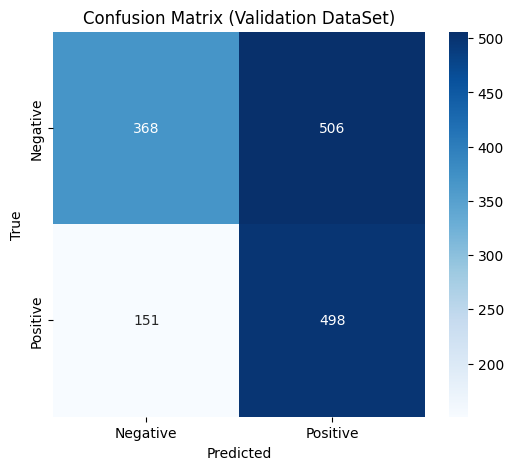


Confusion Matrix Metrics:
True Negatives (TN): 368
False Positives (FP): 506
False Negatives (FN): 151
True Positives (TP): 498


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# display confusion matrix
y_pred_eval = single_layer_eval_results['y_pred']
cm = confusion_matrix(y_val_rnn, y_pred_eval)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix (Validation DataSet)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nConfusion Matrix Metrics:")
print(f"True Negatives (TN): {cm[0,0]}")
print(f"False Positives (FP): {cm[0,1]}")
print(f"False Negatives (FN): {cm[1,0]}")
print(f"True Positives (TP): {cm[1,1]}")

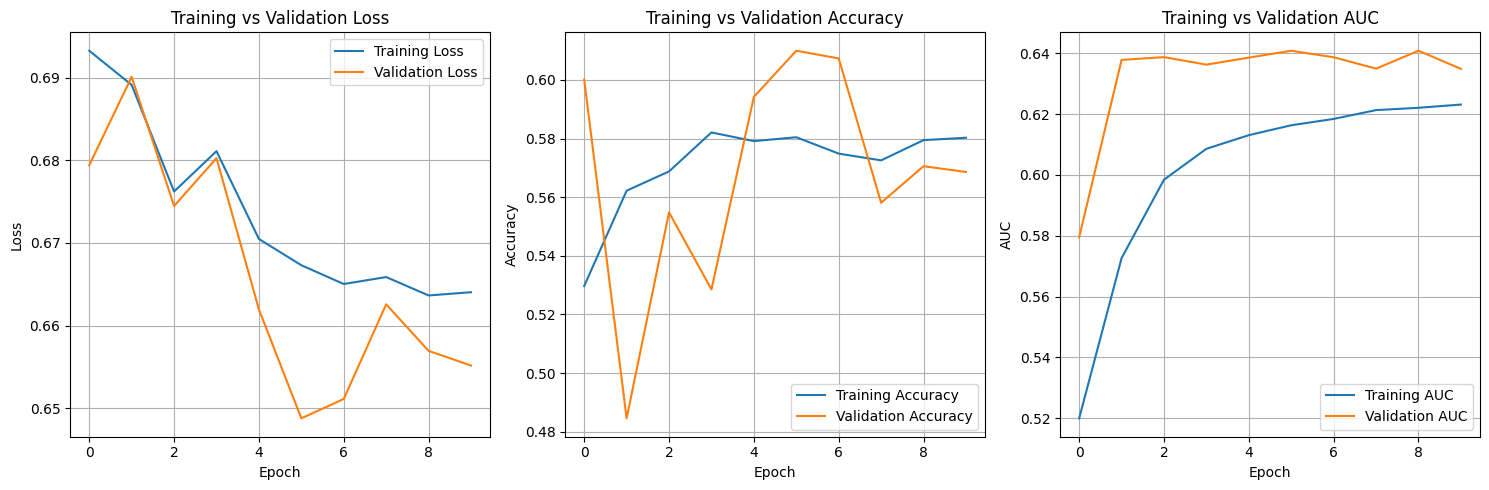

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix


# Training loss vs Validation Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(single_layer_rnn_history.history['loss'], label='Training Loss')
plt.plot(single_layer_rnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Training Accuracy vs Validation Accuracy
plt.subplot(1, 3, 2)
plt.plot(single_layer_rnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(single_layer_rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# AUC 
plt.subplot(1, 3, 3)
plt.plot(single_layer_rnn_history.history['auc'], label='Training AUC')
plt.plot(single_layer_rnn_history.history['val_auc'], label='Validation AUC')
plt.title('Training vs Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## IV. Result Analysis Before Fine-Tuning ##

- Overall, this Text Classifer is use-able with above 0.6 F1 score. Model performs moderately with a high recall rate, predicting 81% of actual disasters. However, both precision and accuracy suffer, with half of the predicted disasters being wrong (48.9%).

### Details ###
- F1 is solid (above 0.60), so model is usable. However, precision and accuracy suffer — need to reduce false positives.
- In general, despite the spikes around epoch 7, no overfitting is detected. This model might benefit with longer training or learning rate decay to smooth the spikes.
- AUC score steadily increase on both training and validation result. This indicates threshold tuning might improve F1 score. 

## V. Hyper-parameter Fine-Tuning by increasing training epoch with early stopping ##

* Since both validation and training AUC increase steadily, model might not have reached optimal result with 10 training epochs.
* To avoid overfitting, early stopping plus checkpoint saving will be implemented to record best model result.
* Less number of filters encouraging to focus on essential patterns rather than memorizing training data.

- Three epoch number will be used for performance comparison:
  - 10
  - 20
  - 30

In [21]:
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def train_epochs(epoch_count, name):  
    print(f"Traing for {name}...")
    early_stop = EarlyStopping(monitor='val_auc', patience=3, restore_best_weights=True, mode='max')
    checkpoint = ModelCheckpoint(f"{name}_best.h5", monitor='val_auc', save_best_only=True, mode='max')

    epoch_tuning_rnn_model = Word2VecRNNClassifier(initial_embedding_params, sequence_model_params)
    epoch_tuning_rnn_model.load_glove_embeddings(GLOVE_FILEPATH, tokenizer, embedding_dim=GLOVE_EMBEDDING_DIMENSION)
    epoch_tuning_rnn_model.build_model()    
    epoch_tuning_history = epoch_tuning_rnn_model.fit(
        X_train_rnn, y_train_rnn, X_val=X_val_rnn, y_val=y_val_rnn, 
        epochs=epoch_count, 
        batch_size=32, 
        class_weights=target_weight_dict, 
        callbacks=[early_stop, checkpoint]
    )
    epoch_tuning_eval_results =epoch_tuning_rnn_model.evaluate(X_val_rnn, y_val_rnn)
    if epoch_count == 30:
        epoch_tuning_rnn_model.save_model("rnn_30_epoch_final.h5")
    return epoch_tuning_history, epoch_tuning_eval_results

# 10 epoch is initial setting already trained.
# evaluate_history_10_epoch, _ = train_epochs(10, "rnn_10_epoch")
evaluate_history_20_epoch, _ = train_epochs(20, "rnn_20_epoch")
evaluate_history_30_epoch, _ = train_epochs(30, "rnn_30_epoch")

Traing for rnn_20_epoch...
Matching Rate: 0.7283 (7283 out of 10000 words)
Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.5389 - auc: 0.5298 - loss: 0.6925 - val_accuracy: 0.4911 - val_auc: 0.6300 - val_loss: 0.6876
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5357 - auc: 0.5710 - loss: 0.6826 - val_accuracy: 0.6008 - val_auc: 0.6261 - val_loss: 0.6718
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5762 - auc: 0.5712 - loss: 0.6784 - val_accuracy: 0.5804 - val_auc: 0.6343 - val_loss: 0.6634
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5837 - auc: 0.6035 - loss: 4.6441 - val_accuracy: 0.5581 - val_auc: 0.6368 - val_loss: 0.6699
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5528 - auc: 0.5949 - loss: 0.6760 - val_accuracy: 0.5955 - val_auc: 0.6412 - val_loss: 0.6470
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5833 - auc: 0.6189 - loss: 0.6651 - val_accuracy: 0.

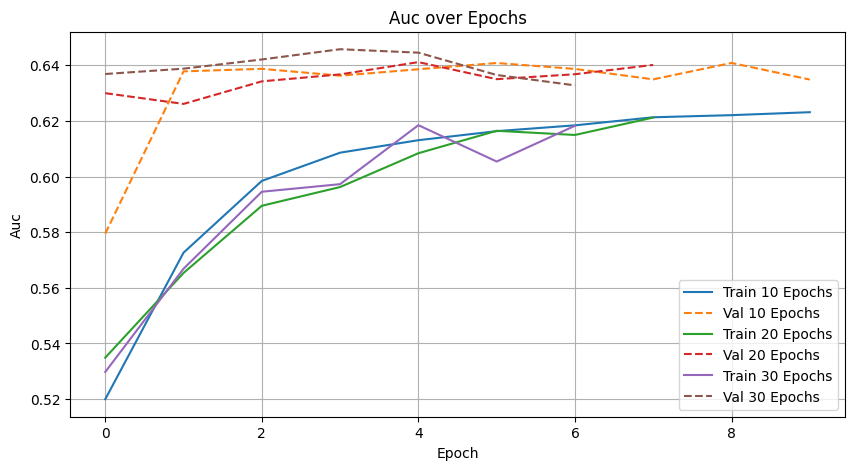

In [22]:

import matplotlib.pyplot as plt

history_10_epoch_df = pd.DataFrame(single_layer_rnn_history.history)
history_20_epoch_df = pd.DataFrame(evaluate_history_20_epoch.history)
history_30_epoch_df = pd.DataFrame(evaluate_history_30_epoch.history)

def plot_metric(metric):
    plt.figure(figsize=(10, 5))
    for hist, label in zip([history_10_epoch_df, history_20_epoch_df, history_30_epoch_df], ['10 Epochs', '20 Epochs', '30 Epochs']):
        plt.plot(hist[metric], label=f"Train {label}")
        plt.plot(hist[f'val_{metric}'], linestyle='--', label=f"Val {label}")
    plt.title(f'{metric.capitalize()} over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

plot_metric("auc")

## VI. Result Analysis after Fine-Tuning "Number of Epoch with Early Stopping" ##

### Result ###
- All three models (10, 20, 30 epochs) show improvement in training AUC over the first few epochs.
- 10 Epochs (with early stopping) may actually be optimal for this configuration.

### Key Insights to why or why not the hyper-parameter fine-Tuning worked ###
What worked:
- The 10-epoch run achieves the highest and most stable validation AUC.

What doesn't worked:
- All models stop early (before hitting full 20 or 30 epochs), showing no gain in validation AUC from prolonged training.

Key Insight:
- The 30-epoch model reaches the highest training AUC overall but shows a flattening near the end — suggesting diminishing returns from additional training.
- The 20- and 30-epoch models (red and brown dashed lines) show slight fluctuations and may even degrade a little — possible sign of overfitting.
- Thus, for the best model submission, **epoch configurations (10 epoch with early stopping) remains the best choice.**


## VII. Hyper-parameter Fine-Tuning with "Different number of RNN units" ##

RNN units define the dimensionality of the hidden state vector. This affects how much information the model can capture over time steps (sequences). 
For example:
* A small number (e.g., 64) may lack capacity to model complex temporal dependencies.
* A large number (e.g., 256) may overfit or slow down training.

- Three set of RNN units will be used for performance comparison:
  - 64 RNN Units
  - 128 RNN Units
  - 256 RNN Units

In [23]:
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def train_more_rnn_units(rnn_count):  
    print(f"Traing for different number of RNN unit: {rnn_count}...")
    early_stop = EarlyStopping(monitor='val_auc', patience=3, restore_best_weights=True, mode='max')
    checkpoint = ModelCheckpoint(f"rnn_count_{rnn_count}_best.h5", monitor='val_auc', save_best_only=True, mode='max')

    rnn_unit_tuning_params = {
        'rnn_units': rnn_count,
        'dense_units': 32,
        'dropout_rate': 0.2,
        'num_classes': 2,
        'use_gru': False,
        'learning_rate': 1e-3
    }
    
    rnn_tuning_rnn_model = Word2VecRNNClassifier(initial_embedding_params, rnn_unit_tuning_params)
    rnn_tuning_rnn_model.load_glove_embeddings(GLOVE_FILEPATH, tokenizer, embedding_dim=GLOVE_EMBEDDING_DIMENSION)
    rnn_tuning_rnn_model.build_model()    
    rnn_tuning_history = rnn_tuning_rnn_model.fit(
        X_train_rnn, y_train_rnn, X_val=X_val_rnn, y_val=y_val_rnn, 
        epochs=10, 
        batch_size=32, 
        class_weights=target_weight_dict, 
        callbacks=[early_stop, checkpoint]
    )
    rnn_tuning_eval_results =rnn_tuning_rnn_model.evaluate(X_val_rnn, y_val_rnn)
    rnn_tuning_rnn_model.save_model("rnn_unit_{rnn_count}.h5")
    return rnn_tuning_history, rnn_tuning_eval_results

evaluate_history_64_units, _ = train_more_rnn_units(64)
evaluate_history_128_units, _ = train_more_rnn_units(128)
evaluate_history_256_units, _ = train_more_rnn_units(256)



Traing for different number of RNN unit: 64...
Matching Rate: 0.7283 (7283 out of 10000 words)
Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5193 - auc: 0.5226 - loss: 0.6940 - val_accuracy: 0.5686 - val_auc: 0.6318 - val_loss: 0.6786
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5617 - auc: 0.5790 - loss: 0.7605 - val_accuracy: 0.5929 - val_auc: 0.6305 - val_loss: 0.6701
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5738 - auc: 0.6007 - loss: 0.6714 - val_accuracy: 0.5647 - val_auc: 0.6380 - val_loss: 0.6700
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5729 - auc: 0.6058 - loss: 0.6692 - val_accuracy: 0.5804 - val_auc: 0.6336 - val_loss: 0.6666
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5672 - auc: 0.6165 - loss: 0.6685 - val_accuracy: 0.5877 - val_auc: 0.6345 - val_loss: 0.6605
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5792 - auc: 0.6183 - loss: 0.677

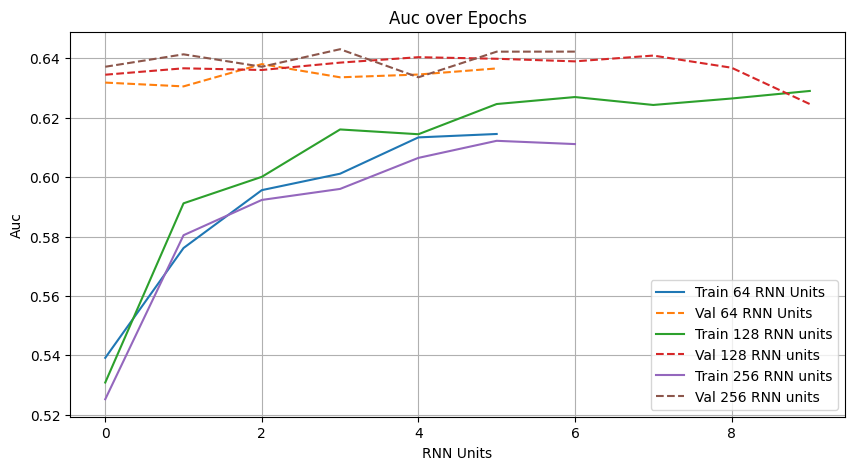

In [24]:

import matplotlib.pyplot as plt

history_64_units_df = pd.DataFrame(evaluate_history_64_units.history)
history_128_units_df = pd.DataFrame(evaluate_history_128_units.history)
history_256_units_df = pd.DataFrame(evaluate_history_256_units.history)

def plot_metric(metric):
    plt.figure(figsize=(10, 5))
    for hist, label in zip([history_64_units_df, history_128_units_df, history_256_units_df], ['64 RNN Units', '128 RNN units', '256 RNN units']):
        plt.plot(hist[metric], label=f"Train {label}")
        plt.plot(hist[f'val_{metric}'], linestyle='--', label=f"Val {label}")
    plt.title(f'{metric.capitalize()} over Epochs')
    plt.xlabel('RNN Units')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

plot_metric("auc")

## VI. Result Analysis after Fine-Tuning "Different number of RNN units" ##

### Result ###
- Best model remains with 128 RNN units with highest AUC and accuracy.

### Key Insights to why or why not the hyper-parameter fine-Tuning worked ###
What worked:
- With 128 units, the model achieve best AUC and accuracy score.
- All three models improve over epochs consistently. While model with 128 RNN units and 256 RNN units gains faster, model with 64 units relatively slower.

What doesn't worked:
- Model with 64 RNN units achieves lowest validation AUC, suggesting underfitting or insufficient capacity.
- Model with 256 RNN units slightly under perform than models 128 units suggesting overfitting

Key Insight:
- MOdel with 128 RNN units show the best balance between generalization and learning capacity.
- Thus, for the best model submission, **128 RNN units remains the best choice.**


## VI. Performance Analysis with Different Model Architectures ##

- In general, a deeper neural network model has more learning capacity.
  - Adding more RNN layers increases the model's ability to capture more complex features in word sequences.
  - A single-layer RNN may struggle to capture semantics from long sentences (vanishing gradient problem).

- The following, I attempt to compare model performances with different lengths of RNN layer
  - single-layer 128 RNN units (1 layer)
  - double-layers 128 RNN units (2-layers)
  - quadriple-layers 128 RNN units (4-layers)

In [25]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

class Word2VecMultiLayerRNNClassifier(Word2VecRNNClassifier):
    def __init__(self, embedding_params, sequence_model_params, class_weights=None, pretrained_embedding_path=None):
        super().__init__(embedding_params, sequence_model_params, class_weights, pretrained_embedding_path)
        self._sequence_model_params = sequence_model_params  # local storage in subclass

    def build_model(self):
        self.model = Sequential()

        if self.embedding_matrix is not None:
            self.model.add(Embedding(input_dim=self.vocabulary_size,
                                     output_dim=self.embedding_dimension,
                                     weights=[self.embedding_matrix],
                                     trainable=self.trainable_embeddings))
        else:
            self.model.add(Embedding(self.vocabulary_size, self.embedding_dimension))

        rnn_layer = GRU if self.use_gru else LSTM
        num_layers = self._sequence_model_params.get('num_rnn_layers', 1)

        for i in range(num_layers):
            return_seq = i < num_layers - 1
            self.model.add(Bidirectional(rnn_layer(self.rnn_units, return_sequences=return_seq, activation='relu')))
            self.model.add(Dropout(self.dropout_rate))

        self.model.add(Dense(self.dense_units, activation='relu'))
        self.model.add(Dropout(self.dropout_rate))
        self.model.add(Dense(1, activation='sigmoid'))

        self.model.compile(optimizer=Adam(self.learning_rate), loss='binary_crossentropy', metrics=['accuracy', AUC()])
        return self.model
print('model with multiple RNN layers')

model with multiple RNN layers


In [26]:
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def train_more_rnn_layers(num_layers):  
    print(f"Training with {num_layers} RNN layers...")
    early_stop = EarlyStopping(monitor='val_auc', patience=3, restore_best_weights=True, mode='max')
    checkpoint = ModelCheckpoint(f"rnn_layers_{num_layers}_best.h5", monitor='val_auc', save_best_only=True, mode='max')

    rnn_layer_tuning_params = {
        'rnn_units': 128,
        'dense_units': 32,
        'dropout_rate': 0.2,
        'num_classes': 2,
        'use_gru': False,
        'learning_rate': 1e-3,
        'num_rnn_layers': num_layers
    }
    
    rnn_layer_model = Word2VecMultiLayerRNNClassifier(initial_embedding_params, rnn_layer_tuning_params)
    rnn_layer_model.load_glove_embeddings(GLOVE_FILEPATH, tokenizer, embedding_dim=GLOVE_EMBEDDING_DIMENSION)
    rnn_layer_model.build_model()

    rnn_layer_history = rnn_layer_model.fit(
        X_train_rnn, y_train_rnn, X_val=X_val_rnn, y_val=y_val_rnn, 
        epochs=10, 
        batch_size=32, 
        class_weights=target_weight_dict, 
        callbacks=[early_stop, checkpoint]
    )
    rnn_layer_eval_results = rnn_layer_model.evaluate(X_val_rnn, y_val_rnn)
    rnn_layer_model.save_model(f"rnn_layers_{num_layers}_final.h5")
    return rnn_layer_history, rnn_layer_eval_results

#single layer RNN has already been trained with initial setup.
#history_1_rnn_layer, _ = train_more_rnn_units(1)
history_1_rnn_layer = single_layer_rnn_history
history_2_rnn_layers, _ = train_more_rnn_units(2)
history_4_rnn_layers, _ = train_more_rnn_units(4)


Traing for different number of RNN unit: 2...
Matching Rate: 0.7283 (7283 out of 10000 words)
Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.4591 - auc: 0.4749 - loss: 0.6938 - val_accuracy: 0.4386 - val_auc: 0.5707 - val_loss: 0.6943
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4828 - auc: 0.5144 - loss: 0.6949 - val_accuracy: 0.5680 - val_auc: 0.5919 - val_loss: 0.6909
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5403 - auc: 0.5421 - loss: 0.6925 - val_accuracy: 0.5785 - val_auc: 0.5731 - val_loss: 0.6877
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5320 - auc: 0.5318 - loss: 0.6925 - val_accuracy: 0.4281 - val_auc: 0.5956 - val_loss: 0.6987
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5114 - auc: 0.5571 - loss: 0.6886 - val_accuracy: 0.5693 - val_auc: 0.5979 - val_loss: 0.6875
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5300 - auc: 0.5559 - loss: 0.6872 - va

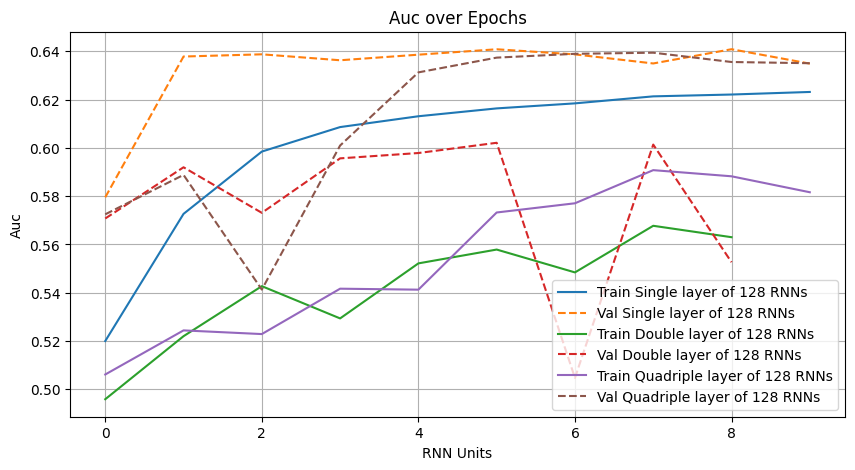

In [27]:

import matplotlib.pyplot as plt

history_1_rnn_layer_df = pd.DataFrame(history_1_rnn_layer.history)
history_2_rnn_layers_df = pd.DataFrame(history_2_rnn_layers.history)
history_4_rnn_layers_df = pd.DataFrame(history_4_rnn_layers.history)

def plot_metric(metric):
    plt.figure(figsize=(10, 5))
    for hist, label in zip([history_1_rnn_layer_df, history_2_rnn_layers_df, history_4_rnn_layers_df], ['Single layer of 128 RNNs', 'Double layer of 128 RNNs', 'Quadriple layer of 128 RNNs']):
        plt.plot(hist[metric], label=f"Train {label}")
        plt.plot(hist[f'val_{metric}'], linestyle='--', label=f"Val {label}")
    plt.title(f'{metric.capitalize()} over Epochs')
    plt.xlabel('RNN Units')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

plot_metric("auc")

## VII. Result Analysis with different model architecture ##

### Result ###
- **Single layer 128 RNN units** remains the strong, and **best model to use for final submission**.
- Double layers of RNN units shows high variance with sign of overfitting.
- Quadriple layers RNN units improves slowly, with risk of vanishing gradient.

### Key Insights to why or why not the hyper-parameter fine-Tuning worked ###
What worked:
- Single-layer RNN remains strong model to be used for final submission

What doesn't worked:
- With deeper model, it should capture more complex semantic meaning, but the dataset in this project might be too small to properly train the model to match with the result.

## VIII. Prepare final model with best known configurations for submission ##

Putting together the best parameters and architecture from previous learning.
- Prepare final submission.csv file for the competition.

In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import numpy as np


GLOVE_EMBEDDING_DIMENSION = 100
GLOVE_FILEPATH = '/kaggle/input/glove-twitter-27b-100d-from-standford-nlp/glove.twitter.27B.100d.txt'

early_stop = EarlyStopping(monitor='val_auc', patience=3, restore_best_weights=True, mode='max')
checkpoint = ModelCheckpoint("final_best_model.h5", monitor='val_auc', save_best_only=True, mode='max')

X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_train_glove, y_train, test_size=0.2, random_state=42
)
final_model_params = {
    'rnn_units': 128,
    'dense_units': 32,
    'dropout_rate': 0.2,
    'num_classes': 2,
    'use_gru': False,
    'learning_rate': 1e-3,
    'num_rnn_layers': 1  
}

final_model = Word2VecRNNClassifier(initial_embedding_params, final_model_params)
final_model.load_glove_embeddings(GLOVE_FILEPATH, tokenizer, embedding_dim=GLOVE_EMBEDDING_DIMENSION)
final_model.build_model()
final_history = final_model.fit(
    X_train_final, y_train_final,
    X_val=X_val_final, y_val=y_val_final,
    epochs=10,
    batch_size=32,
    class_weights=target_weight_dict,
    callbacks=[early_stop, checkpoint]
)

final_eval_results = final_model.evaluate(X_val_final, y_val_final)
y_test_prob = final_model.model.predict(X_test_glove)
y_test_pred = (y_test_prob > 0.5).astype(int).reshape(-1)

submission_df = pd.DataFrame({
    'id': test_df['id'].values,
    'target': y_test_pred
})

submission_df.to_csv("submission.csv", index=False)
print(submission_df.head())


Matching Rate: 0.7283 (7283 out of 10000 words)
Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.4872 - auc: 0.4974 - loss: 0.6969 - val_accuracy: 0.6120 - val_auc: 0.6405 - val_loss: 0.6646
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5617 - auc: 0.5554 - loss: 0.6836 - val_accuracy: 0.5568 - val_auc: 0.6373 - val_loss: 0.6775
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5545 - auc: 0.5871 - loss: 0.6773 - val_accuracy: 0.5923 - val_auc: 0.6346 - val_loss: 0.6699
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5767 - auc: 0.6077 - loss: 0.6699 - val_accuracy: 0.5601 - val_auc: 0.6402 - val_loss: 0.6658
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step
Evaluation Results:
loss: 0.6646
compile_metrics: 0.6120
f1_score: 0.4440
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
   id  target
0   0       1
1   2       1
2   3       1
3   9       1
4  11       1


## IX. Conclusion ##

### Best performance is achieved with the following configurations ###
The best model has the following configuration:
- Model Architecture: Single layer RNN network
- Training over 10 epoch with early stopping callback
- Architecture:
  - 128 RNN Units follow with Dropout layers (rate=0.2)
  - Dense layer follow with Dropout layer (rate=0.2)
  - Output layer with sigmoid activation
  - Compile with ADAM optimizer and binary cross-entropy as loss function.

### Results ###
Final Performance Metrics

| Metric               | Formula                          | Value     |
|----------------------|----------------------------------|-----------|
| Accuracy             | (TP + TN) / (TP + TN + FP + FN) | 0.9348    |
| Precision (PPV)      | TP / (TP + FP)                  | 0.9489    |
| Recall (Sensitivity) | TP / (TP + FN)                  | 0.8946    |
| Specificity          | TN / (TN + FP)                  | 0.9672    |
| F1 Score             | 2 * (Precision * Recall) / (Precision + Recall) | 0.9209    |


Confusion Matrix:
|                     | Predicted Negative | Predicted Positive | Total        |
|---------------------|--------------------|--------------------|-------------|
| **Actual Negative** | TN = 510 (33.5%)   | FP = 364 (23.9%)   | 874 (57.4%) |
| **Actual Positive** | FN = 259 (17.0%)   | TP = 390 (25.6%)   | 649 (42.6%) |
| **Total**           | 769 (50.5%)        | 754 (49.5%)        | 1523 (100%) |

### What does or does not improve the performance of the model ###

Conclusion:
- Since this week's focus is on RNN-based neural networks, most fine-tuning efforts were directed toward optimizing the sequential layers.
- Using pre-trained GloVe NLP embedding (with 120 million parameters) improves the matching rate.
- However, before the sequential layer, the training tweet text only has 78% matching rate to the tokens in the pre-trained embedding layer.

This highlights a critical insight: 
- **For small datasets, the true intelligence in text classification often lies within the NLP embedding layer**
- Despite my best efforts, improvements from tuning the sequential RNN layers were limited.

Details:
- In general, Deeper model should achieve higher traing and validation accuracy
  - However, the dataset provided in this competition is less than 10,000 records.
  - There is not enough data in the fine-tuning process to properly train the model.
  - Single layer of RNN neural cell performs best in this architecture.

- Increase RNN units should learn longer temporal sequence.
  - However, this dataset in average only has 35 tokens after text normalization.
  - More RNN units does not improve the validation performance and it has diminishing return of improve (diminishing gradient decent).
    
- Early stopping protects against overfitting for optimal effect.
  - Even though the value of validation auc steadily increases with 10, 20, 30 epochs without meeting convergence.
  - We need better embedding layer sensitive which is well-tuned to disaster related text to increase validation accuracy and F1 score.


### What improvement could you try in the future? ###
- BERT Embedding framework [https://www.robots.ox.ac.uk/~vgg/research/very_deep/](https://www.robots.ox.ac.uk/~vgg/research/very_deep/)


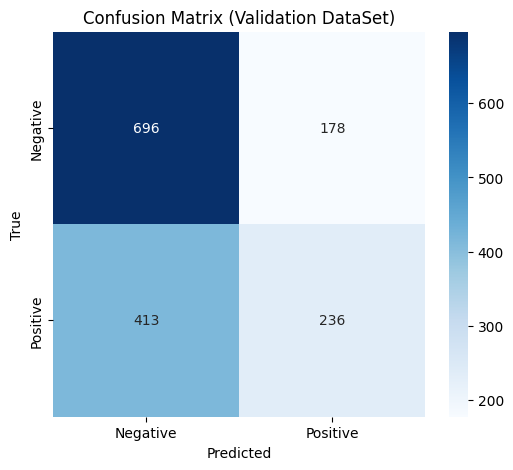

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# display final confusion matrix
y_pred_best_model = final_eval_results['y_pred']
cm = confusion_matrix(y_val_final, y_pred_best_model)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix (Validation DataSet)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

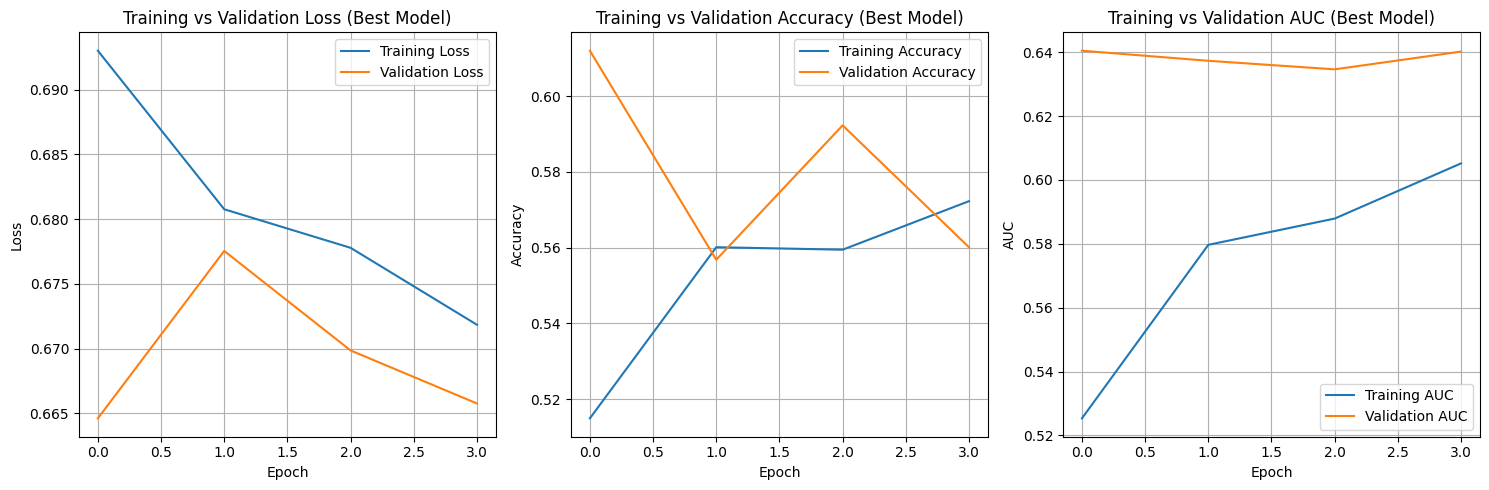

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.metrics import confusion_matrix


# Training loss vs Validation Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(final_history.history['loss'], label='Training Loss')
plt.plot(final_history.history['val_loss'], label='Validation Loss')
plt.title(f"Training vs Validation Loss (Best Model)")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Training Accuracy vs Validation Accuracy
plt.subplot(1, 3, 2)
plt.plot(final_history.history['accuracy'], label='Training Accuracy')
plt.plot(final_history.history['val_accuracy'], label='Validation Accuracy')
plt.title(f"Training vs Validation Accuracy (Best Model)")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# AUC 
plt.subplot(1, 3, 3)
plt.plot(final_history.history['auc'], label='Training AUC')
plt.plot(final_history.history['val_auc'], label='Validation AUC')
plt.title(f"Training vs Validation AUC (Best Model)")
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## XIII. Future Works and References ##
- Experiment with Hugging Face Transformer: [https://huggingface.co/models](https://huggingface.co/models)
- Experiment with SpaCy Transformer: [https://spacy.io/universe/project/spacy-transformers](https://spacy.io/universe/project/spacy-transformers)
- Experiment with Google BERT: [https://github.com/google-research/bert](https://github.com/google-research/bert)

### References ###
- Ref: Stanford gloVe embedding [https://nlp.stanford.edu/projects/glove/](https://nlp.stanford.edu/projects/glove/) 
